In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ("/content/drive/MyDrive/praktikumML/tugas07")

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


**Pemilihan Fitur**

In [ ]:
X = df[["Weight", "Size"]]

y = df["Class"]

In [ ]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [ ]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


**Split dan Bangun Model SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

**Evaluasi Akurasi dan Report Klasifikasi**

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Confusion Matrix:
[[3 0]
 [0 5]]


**Confusion Matrix**

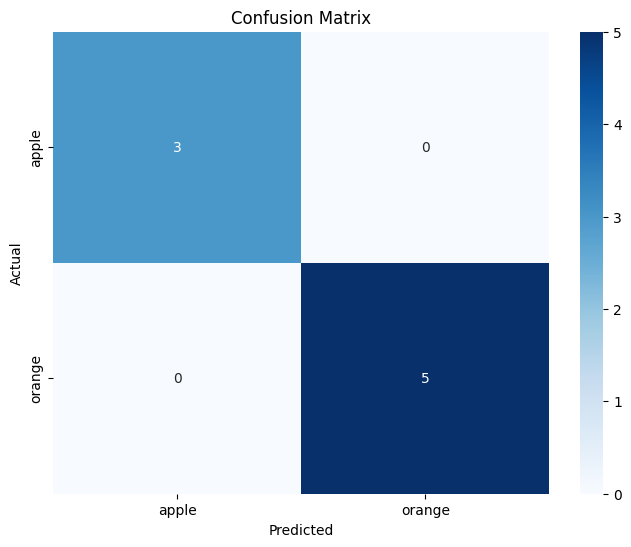

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['apple', 'orange'], yticklabels=['apple', 'orange'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Visualisasi Model Hasil SVM**

/tmp/ipython-input-3271478244.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



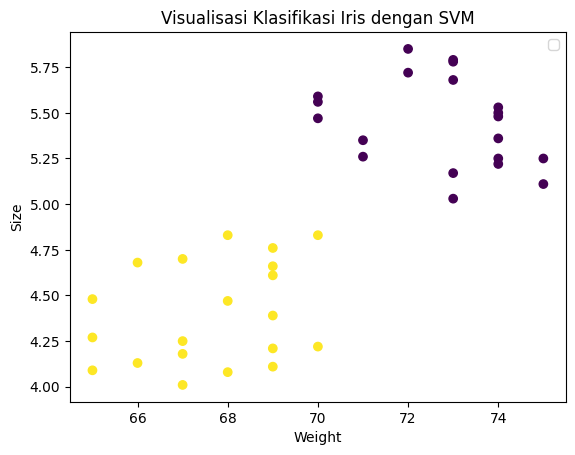

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.show()

**3D Visualisasi Hasil Model SVM**

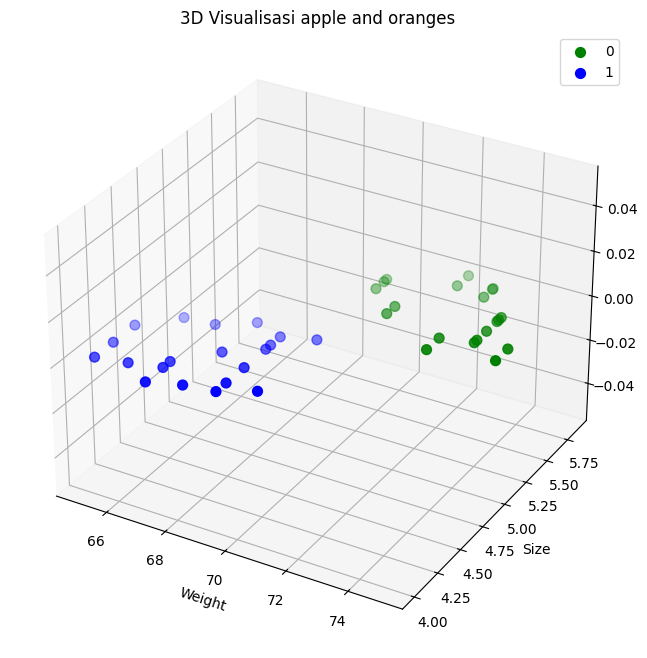

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['Class'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_title('3D Visualisasi apple and oranges')
ax.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Weight', y='Size', z=np.zeros(len(df)), color='Class',
                     title='Interactive 3D Visualization of SVM Results')

# Create a meshgrid for the decision boundary
x_min, x_max = df['Weight'].min() - 1, df['Weight'].max() + 1
y_min, y_max = df['Size'].min() - 1, df['Size'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Get the separating hyperplane equation (for linear kernel)
w = model.coef_[0]
b = model.intercept_[0]
zz = (-w[0] * xx - w[1] * yy - b) / (w[2] if len(w) > 2 and w[2] != 0 else 1e-9)

# Add the decision boundary surface to the plot
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.5, showscale=False, colorscale='Blues'))

fig.update_layout(scene = dict(
    xaxis_title='Weight',
    yaxis_title='Size',
    zaxis_title='Decision Function'),
    margin=dict(l=0, r=0, b=0, t=40))

fig.show()